In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import lil_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


     |████████████████████████████████| 65.9MB 59kB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/content/train.csv')
test  = pd.read_csv("/content/test.csv")


In [3]:
train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16516 non-null  object 
 1   Category             16516 non-null  object 
 2   Rating               16516 non-null  float64
 3   Reviews              16516 non-null  int64  
 4   Size                 16516 non-null  object 
 5   Price                16516 non-null  object 
 6   Content_Rating       16516 non-null  object 
 7   Last_Updated_On      16516 non-null  object 
 8   Release_Version      16516 non-null  object 
 9   OS_Version_Required  16516 non-null  object 
 10  Downloads            16516 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [5]:
train.Offered_By.value_counts()

ps_id-863      20
ps_id-1157     14
ps_id-30634     9
ps_id-35979     8
ps_id-216       7
               ..
ps_id-36120     1
ps_id-28026     1
ps_id-1027      1
ps_id-24373     1
ps_id-25160     1
Name: Offered_By, Length: 15520, dtype: int64

In [6]:
# train.Category.value_counts().plot.bar()
train.Category.value_counts()

Education              1440
Tools                  1231
Entertainment           927
Books And Reference     741
Family                  686
Finance                 667
Lifestyle               659
Productivity            570
Music And Audio         526
Business                521
Health And Fitness      441
Personalization         440
Game                    426
News And Magazines      413
Photography             408
Game Puzzle             398
Sports                  397
Shopping                378
Travel And Local        369
Communication           365
Medical                 326
Game Casual             287
Game Arcade             280
Social                  271
Game Action             235
Video Players           222
Food And Drink          222
Game Card               192
Game Simulation         192
Maps And Navigation     179
Game Educational        179
Game Role Playing       169
Game Strategy           166
Game Adventure          130
Auto And Vehicles       126
Game Sports         

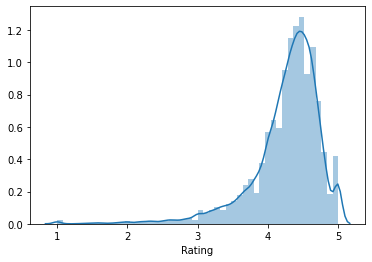

In [7]:
sns.distplot(train.Rating)
train['Rating'].plot

In [8]:
train.Reviews.value_counts()

1         175
2         163
3         158
6         128
4         127
         ... 
540930      1
4360        1
2315        1
28948       1
633665      1
Name: Reviews, Length: 9124, dtype: int64

In [9]:
train.Size.value_counts()

Varies with device    1918
11M                    397
12M                    344
15M                    325
14M                    325
                      ... 
246k                     1
92k                      1
140k                     1
42k                      1
81k                      1
Name: Size, Length: 439, dtype: int64

In [10]:
train.Price.value_counts()

Free                  15450
222.9942                184
73.8342                 163
148.4142                153
372.1542                120
                      ...  
78.309                    1
469.1082                  1
730.1381999999999         1
186.45                    1
164.07600000000002        1
Name: Price, Length: 83, dtype: int64

In [11]:
train.Content_Rating.value_counts()

Everyone           13895
Teen                1590
Everyone 10+         596
Mature 17+           429
Adults only 18+        4
Unrated                2
Name: Content_Rating, dtype: int64

In [12]:
train.Last_Updated_On.value_counts()

May 06 2020    454
May 05 2020    353
May 01 2020    264
May 02 2020    251
Apr 30 2020    227
              ... 
Apr 13 2015      1
May 03 2016      1
Feb 21 2017      1
Oct 30 2016      1
Jun 06 2016      1
Name: Last_Updated_On, Length: 1583, dtype: int64

In [13]:
train.Release_Version.value_counts()

Varies with device    1538
1                      769
1.1                    347
1.2                    276
1.3                    229
                      ... 
2.378.290058             1
1.25.30                  1
1.1.07.6                 1
1.0.443                  1
4.813                    1
Name: Release_Version, Length: 4190, dtype: int64

In [14]:
train.OS_Version_Required.value_counts()

4.1 and up            4363
4.0.3 and up          2549
4.0 and up            1894
4.4 and up            1831
Varies with device    1451
5.0 and up            1283
2.3 and up             753
4.2 and up             689
4.3 and up             348
2.3.3 and up           288
2.2 and up             252
3.0 and up             235
6.0 and up             140
2.1 and up             116
5.1 and up              65
1.6 and up              62
7.0 and up              48
1.5 and up              36
2.0 and up              29
3.2 and up              29
4.4w and up             15
3.1 and up              12
8.0 and up              12
2.0.1 and up             9
7.1 and up               5
1.1 and up               1
1.0 and up               1
Name: OS_Version_Required, dtype: int64

In [15]:
train.Downloads.value_counts()

100,000+          3158
1,000,000+        2707
10,000+           2239
500,000+          1360
10,000,000+       1277
50,000+           1243
1,000+            1221
5,000,000+         912
5,000+             763
100+               508
500+               364
100,000,000+       266
50,000,000+        247
10+                 91
50+                 84
500,000,000+        42
1,000,000,000+      33
5,000,000,000+       1
Name: Downloads, dtype: int64

In [ ]:
test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up


In [84]:
df_train = pd.read_csv('/content/train.csv')
df_train['train_flag'] = 1
print(df_train.shape)

df_test = pd.read_csv('/content/test.csv')
df_test['train_flag'] = 0
df_test['Downloads'] = "100,000+"
print(df_test.shape)

df_data = pd.concat([df_train,df_test])
print(df_data.shape)
df_data = df_data.reset_index(drop=True)
df_data

(16516, 12)
(24776, 12)
(41292, 12)


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,train_flag
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+",1
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+",1
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+",1
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+",1
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+",1
...,...,...,...,...,...,...,...,...,...,...,...,...
41287,ps_id-30176,Shopping,3.74,38,21M,Free,Everyone,Feb 16 2020,2.4.20,4.1 and up,"100,000+",0
41288,ps_id-5357,Auto And Vehicles,4.80,4,4.5M,Free,Everyone,Jan 02 2019,1.3,5.0 and up,"100,000+",0
41289,ps_id-1920,Education,4.78,499,1.1M,Free,Everyone,Feb 16 2018,1.1,4.0.3 and up,"100,000+",0
41290,ps_id-6655,Game Puzzle,4.61,328050,72M,Free,Everyone,May 02 2020,2.5.3,4.1 and up,"100,000+",0


In [85]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41292 entries, 0 to 41291
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           41292 non-null  object 
 1   Category             41292 non-null  object 
 2   Rating               41292 non-null  float64
 3   Reviews              41292 non-null  int64  
 4   Size                 41292 non-null  object 
 5   Price                41292 non-null  object 
 6   Content_Rating       41292 non-null  object 
 7   Last_Updated_On      41292 non-null  object 
 8   Release_Version      41292 non-null  object 
 9   OS_Version_Required  41292 non-null  object 
 10  Downloads            41292 non-null  object 
 11  train_flag           41292 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 3.8+ MB


In [86]:
df_data["Price"] = df_data["Price"].replace( "Free", 0)
df_data["Price"] = df_data["Price"].astype("float")

df_data["Reviews"] = df_data["Reviews"].astype("int")

df_data["Rating"] = df_data["Rating"].astype("float")

df_data.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,train_flag
0,ps_id-24654,Finance,4.18,1481,Varies with device,0.0000,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+",1
1,ps_id-35329,Music And Audio,4.81,302,10M,0.0000,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+",1
2,ps_id-11044,Game Casual,4.27,374,27M,0.0000,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+",1
3,ps_id-36068,Business,4.03,122058,Varies with device,0.0000,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+",1
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+",1


In [87]:
le = LabelEncoder()
df_data["Category"] = le.fit_transform(df_data["Category"])

df_data["Content_Rating"] = le.fit_transform(df_data["Content_Rating"])

df_data["Size"] = le.fit_transform(df_data["Size"])

df_data["Release_Version"] = le.fit_transform(df_data["Release_Version"])

df_data["OS_Version_Required"] = le.fit_transform(df_data["OS_Version_Required"])


print(df_data.shape)
df_data.head()

(41292, 12)


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,train_flag
0,ps_id-24654,12,4.18,1481,702,0.0000,1,May 05 2020,8031,36,"100,000+",1
1,ps_id-35329,38,4.81,302,37,0.0000,1,Mar 26 2020,5406,21,"5,000+",1
2,ps_id-11044,21,4.27,374,175,0.0000,1,May 01 2020,979,21,"10,000+",1
3,ps_id-36068,4,4.03,122058,702,0.0000,4,May 02 2020,8031,36,"10,000,000+",1
4,ps_id-35831,37,4.60,358,702,297.5742,1,Nov 29 2018,8031,36,"5,000+",1


In [88]:
df_data["Downloads"] = le.fit_transform(df_data["Downloads"])
mapping_dict = dict(zip(le.classes_ , le.transform(le.classes_)))

print(mapping_dict)
df_data.head()

{'1,000+': 0, '1,000,000+': 1, '1,000,000,000+': 2, '10+': 3, '10,000+': 4, '10,000,000+': 5, '100+': 6, '100,000+': 7, '100,000,000+': 8, '5,000+': 9, '5,000,000+': 10, '5,000,000,000+': 11, '50+': 12, '50,000+': 13, '50,000,000+': 14, '500+': 15, '500,000+': 16, '500,000,000+': 17}


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,train_flag
0,ps_id-24654,12,4.18,1481,702,0.0000,1,May 05 2020,8031,36,7,1
1,ps_id-35329,38,4.81,302,37,0.0000,1,Mar 26 2020,5406,21,9,1
2,ps_id-11044,21,4.27,374,175,0.0000,1,May 01 2020,979,21,4,1
3,ps_id-36068,4,4.03,122058,702,0.0000,4,May 02 2020,8031,36,5,1
4,ps_id-35831,37,4.60,358,702,297.5742,1,Nov 29 2018,8031,36,9,1


In [89]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41292 entries, 0 to 41291
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           41292 non-null  object 
 1   Category             41292 non-null  int64  
 2   Rating               41292 non-null  float64
 3   Reviews              41292 non-null  int64  
 4   Size                 41292 non-null  int64  
 5   Price                41292 non-null  float64
 6   Content_Rating       41292 non-null  int64  
 7   Last_Updated_On      41292 non-null  object 
 8   Release_Version      41292 non-null  int64  
 9   OS_Version_Required  41292 non-null  int64  
 10  Downloads            41292 non-null  int64  
 11  train_flag           41292 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 3.8+ MB


In [90]:
train = df_data[df_data["train_flag"] == 1]
test  = df_data[df_data["train_flag"] == 0]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(train.shape , test.shape)
train

(16516, 12) (24776, 12)


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,train_flag
0,ps_id-24654,12,4.18,1481,702,0.0000,1,May 05 2020,8031,36,7,1
1,ps_id-35329,38,4.81,302,37,0.0000,1,Mar 26 2020,5406,21,9,1
2,ps_id-11044,21,4.27,374,175,0.0000,1,May 01 2020,979,21,4,1
3,ps_id-36068,4,4.03,122058,702,0.0000,4,May 02 2020,8031,36,5,1
4,ps_id-35831,37,4.60,358,702,297.5742,1,Nov 29 2018,8031,36,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16511,ps_id-5583,32,4.30,13724,702,0.0000,1,Sep 21 2018,8031,36,1,1
16512,ps_id-15485,2,4.73,70,491,0.0000,1,May 07 2020,117,21,4,1
16513,ps_id-36065,32,4.60,5420,130,0.0000,1,Jul 10 2019,4020,21,16,1
16514,ps_id-12625,43,4.60,1488289,702,0.0000,1,Sep 07 2019,8031,36,8,1


In [91]:
test

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads,train_flag
0,ps_id-18231,24,4.52,1362,242,0.0,1,May 05 2020,1801,18,7,0
1,ps_id-1874,44,4.29,3353,702,0.0,4,May 05 2020,8031,36,7,0
2,ps_id-3182,42,4.55,161855,702,0.0,1,May 05 2020,8031,36,7,0
3,ps_id-31452,15,3.97,545,79,0.0,1,Dec 07 2016,3112,21,7,0
4,ps_id-25641,42,4.65,1672,227,0.0,1,Jan 25 2020,350,25,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24771,ps_id-30176,44,3.74,38,130,0.0,1,Feb 16 2020,3950,21,7,0
24772,ps_id-5357,1,4.80,4,266,0.0,1,Jan 02 2019,1558,29,7,0
24773,ps_id-1920,8,4.78,499,11,0.0,1,Feb 16 2018,796,18,7,0
24774,ps_id-6655,24,4.61,328050,510,0.0,1,May 02 2020,4067,21,7,0


In [197]:
def train_model(X , Y):
    # classifier = LGBMClassifier()
    # param_grid = {"max_depth":[4,6,8,10,-1],
    #       "num_leaves":[7,15,31,63,127],
    #       "min_data_in_leaf":[1,3,5,7,10,25],
    #       "n_estimators":list(range(50,1001,100))}

    # model = RandomizedSearchCV(estimator = classifier,
    #                     param_distributions = param_grid,
    #                     cv = 5,
    #                     n_iter = 10,
    #                     verbose=1000
    #                     )

    # classifier = XGBClassifier(n_jobs = -1)
    # param_grid = {
    #     "n_estimators" : np.arange(100,1200,100),
    #     "max_depth" : np.arange(3,10)
    # }

    # model = RandomizedSearchCV(estimator = classifier,
    #                     param_distributions = param_grid,
    #                     cv = 5,
    #                     n_iter = 10,
    #                     verbose=1000
    #                     )

    # classifier = CatBoostClassifier(verbose=0)
    # param_grid = {
    #     "n_estimators" : np.arange(100,1200,100),
    #     "depth" : np.arange(3,10)
    # }

    # model = RandomizedSearchCV(estimator = classifier,
    #                     param_distributions = param_grid,
    #                     cv = 5,
    #                     n_iter = 10,
    #                     verbose=1000
    #                     )

    model = CatBoostClassifier(n_estimators=1000, depth=4, verbose=0)
    # model = RandomForestClassifier()
    # model = XGBClassifier(n_estimators=1100 , max_depth=3 , verbose=10)
    # model = LGBMClassifier(max_depth=30 , n_estimators=500 , num_leaves=31)
    model.fit(X , Y)
    return model



def prediction(model):
    drop = copy.deepcopy(col_to_drop)
    X = test.drop(drop , axis=1)
    print(X.shape)

    col = model.predict_proba(X)
    # col = model.predict_log_proba(X)

    return col





In [198]:
# Offered_By	Category	Rating	Reviews	Size	Price	Content_Rating	Last_Updated_On	Release_Version	OS_Version_Required	Downloads	train_flag
col_to_drop = ["Offered_By", "Last_Updated_On", "train_flag", "Downloads"]



X = train.drop(col_to_drop , axis=1)
Y = train["Downloads"]
print(X.shape, Y.shape)
m1 = train_model(X , Y)

(16516, 8) (16516,)


In [199]:
print(m1.score(X,Y))
col = prediction(m1)
print(col.shape)




# newcol = []
# if col.shape == (len(df_test),1):
#     for i in range(len(df_test)):
#         newcol.append(col[i][0])
#     col = copy.deepcopy(newcol)
# print(np.array(col).shape)


0.7833010414143861
(24776, 8)
(24776, 18)


In [200]:
col_names = []
for i,j  in mapping_dict.items():
    col_names.append(i)
print(mapping_dict)
print(col_names)

df_fin1 = pd.DataFrame(col, columns = col_names) 
df_fin1.head()

{'1,000+': 0, '1,000,000+': 1, '1,000,000,000+': 2, '10+': 3, '10,000+': 4, '10,000,000+': 5, '100+': 6, '100,000+': 7, '100,000,000+': 8, '5,000+': 9, '5,000,000+': 10, '5,000,000,000+': 11, '50+': 12, '50,000+': 13, '50,000,000+': 14, '500+': 15, '500,000+': 16, '500,000,000+': 17}
['1,000+', '1,000,000+', '1,000,000,000+', '10+', '10,000+', '10,000,000+', '100+', '100,000+', '100,000,000+', '5,000+', '5,000,000+', '5,000,000,000+', '50+', '50,000+', '50,000,000+', '500+', '500,000+', '500,000,000+']


,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,"100,000+","100,000,000+","5,000+","5,000,000+","5,000,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
0,0.000002,0.021017,5.780320e-08,1.512767e-05,0.067395,9.233530e-07,4.888732e-06,0.719998,6.429635e-08,0.000010,0.000027,0.000006,1.876438e-06,0.128472,1.030395e-05,0.000011,0.063029,5.093289e-08
1,0.000001,0.061144,2.897931e-05,6.549662e-07,0.000640,9.360527e-05,7.411526e-07,0.497455,2.550415e-05,0.000008,0.000203,0.000033,8.982005e-08,0.064339,5.349922e-07,0.000010,0.376014,2.749879e-06
2,0.000003,0.022943,2.645061e-06,5.729966e-07,0.000011,8.157568e-01,3.008269e-06,0.000010,6.899950e-03,0.000001,0.153690,0.000014,1.096787e-07,0.000029,5.973234e-04,0.000005,0.000031,2.684901e-06
3,0.000034,0.000390,9.836674e-07,4.154597e-05,0.319092,2.336172e-05,1.160766e-06,0.364029,7.884319e-07,0.000561,0.000018,0.000007,7.180229e-06,0.215657,3.724686e-07,0.000007,0.100130,2.908607e-08
4,0.000008,0.005855,2.154400e-06,6.192367e-06,0.072422,1.458521e-06,2.925607e-05,0.657145,2.016818e-07,0.000095,0.000109,0.000008,3.038156e-06,0.149676,2.786248e-05,0.000081,0.114532,4.081840e-07


In [201]:
# df_fin2 = df_fin1[['10+', '50+', '100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', '100,000+', 
#                    '500,000+', '1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+', '100,000,000+', 
#                     '500,000,000+', '1,000,000,000+',  '5,000,000,000+']]
# df_fin2.head()

In [202]:
df_fin1 = df_fin1.rename(columns = mapping_dict)

filename = "sub.csv"
df_fin1.to_csv(filename , index=False)
from google.colab import files
files.download(filename)
df_fin1.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000002,0.021017,5.780320e-08,1.512767e-05,0.067395,9.233530e-07,4.888732e-06,0.719998,6.429635e-08,0.000010,0.000027,0.000006,1.876438e-06,0.128472,1.030395e-05,0.000011,0.063029,5.093289e-08
1,0.000001,0.061144,2.897931e-05,6.549662e-07,0.000640,9.360527e-05,7.411526e-07,0.497455,2.550415e-05,0.000008,0.000203,0.000033,8.982005e-08,0.064339,5.349922e-07,0.000010,0.376014,2.749879e-06
2,0.000003,0.022943,2.645061e-06,5.729966e-07,0.000011,8.157568e-01,3.008269e-06,0.000010,6.899950e-03,0.000001,0.153690,0.000014,1.096787e-07,0.000029,5.973234e-04,0.000005,0.000031,2.684901e-06
3,0.000034,0.000390,9.836674e-07,4.154597e-05,0.319092,2.336172e-05,1.160766e-06,0.364029,7.884319e-07,0.000561,0.000018,0.000007,7.180229e-06,0.215657,3.724686e-07,0.000007,0.100130,2.908607e-08
4,0.000008,0.005855,2.154400e-06,6.192367e-06,0.072422,1.458521e-06,2.925607e-05,0.657145,2.016818e-07,0.000095,0.000109,0.000008,3.038156e-06,0.149676,2.786248e-05,0.000081,0.114532,4.081840e-07


In [203]:
# col_names = df_fin2.columns
# for ind,j in enumerate(col_names):
#     df_fin2 = df_fin2.rename(columns = {j:ind})

# filename = "ans2.csv"
# df_fin2.to_csv(filename , index=False)
# from google.colab import files
# files.download(filename)
# df_fin2.head()